In [255]:
import sys
import random
sys.path.append("../")
from Core.maze import Maze

# Simplified Prim's Algorithms

## How does it work?
todo

## Is every node connected?
yes

In [256]:
def SimplePrims(maze):
    unvisited = set([(x, y) for x in range(maze.num_columns) for y in range(maze.num_rows)])
    
    # randomly pick a node to start from
    current = (
        random.randint(0, maze.num_rows - 1), 
        random.randint(0, maze.num_columns - 1)
    )

    reachable = set()
    while True:
        unvisited.remove((current[0], current[1]))
        
        # compute reachable neighbors from current node
        if current[0] > 0 and (current[0] - 1, current[1]) in unvisited:
            reachable.add((current[0] - 1, current[1]))
        if current[0] < maze.num_columns - 1 and (current[0] + 1, current[1]) in unvisited:
            reachable.add((current[0] + 1, current[1]))
        if current[1] > 0 and (current[0], current[1] - 1) in unvisited:
            reachable.add((current[0], current[1] - 1))
        if current[1] < maze.num_rows - 1 and (current[0], current[1] + 1) in unvisited:
            reachable.add((current[0], current[1] + 1))
        
        # randomly pick a neighbor since there is no path weight dissimilarity 
        adjacent = random.choice(list(reachable))
        
        # determine direction of path to be added
        directions = []
        if adjacent[0] > 0 and (adjacent[0] - 1, adjacent[1]) not in unvisited:
            directions.append("W")
        if adjacent[0] < maze.num_columns - 1 and (adjacent[0] + 1, adjacent[1]) not in unvisited:
            directions.append("E")
        if adjacent[1] > 0 and (adjacent[0], adjacent[1] - 1) not in unvisited:
            directions.append("N")
        if adjacent[1] < maze.num_rows - 1 and (adjacent[0], adjacent[1] + 1) not in unvisited:
            directions.append("S")
        
        path = random.choice(directions)
        
        maze.add_path((adjacent[0], adjacent[1]), path, 0)
        reachable.remove(adjacent)
        current = adjacent
        
        # terminate when no more reachable nodes are left
        if not reachable:
            return

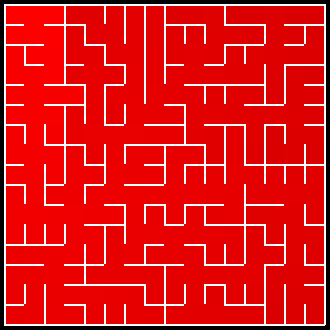

In [257]:
maze = Maze(16, 16)
SimplePrims(maze)
maze.add_colors()
display(maze.draw(cell_width=20))